In [ ]:
import numpy as np
import h5py as h5
from matplotlib import pyplot as plt

In [ ]:
file = '../data/large_test_PC.h5'

In [3]:
SIZE_X_ARR_LOC = '/results/size_x'
SIZE_Y_ARR_LOC = '/results/size_y'

SINGLE_WEIGHT_ARR_LOC = '/results/single_weight'
COUNTER_WEIGHT_ARR_LOC = '/results/counter_weight'

In [4]:
ANNULUS_RES_LOC = '/results/annulus_res'
ANNULUS_RES_STD_LOC = '/results/annulus_res_std'
WINDING_DIFF_X_RES_LOC = '/results/windings_diff_squared_x'
WINDING_DIFF_X_RES_STD_LOC = '/results/windings_diff_squared_x_std'
WINDING_DIFF_Y_RES_LOC = '/results/windings_diff_squared_y'
WINDING_DIFF_Y_RES_STD_LOC = '/results/windings_diff_squared_y_std'
WINDING_SUM_X_RES_LOC = '/results/windings_sum_squared_x'
WINDING_SUM_X_RES_STD_LOC = '/results/windings_sum_squared_x_std'
WINDING_SUM_Y_RES_LOC = '/results/windings_sum_squared_y'
WINDING_SUM_Y_RES_STD_LOC = '/results/windings_sum_squared_y_std'

In [5]:
with h5.File(file, "r") as settings_file:
    size_x = np.array(settings_file[SIZE_X_ARR_LOC])
    size_y = np.array(settings_file[SIZE_Y_ARR_LOC])
    sw = np.array(settings_file[SINGLE_WEIGHT_ARR_LOC])
    cw = np.array(settings_file[COUNTER_WEIGHT_ARR_LOC])


    ann = np.array(settings_file[ANNULUS_RES_LOC])[:, -1]
    ann_s = np.array(settings_file[ANNULUS_RES_STD_LOC])[:, -1]
    w_diff_x = np.array(settings_file[WINDING_DIFF_X_RES_LOC])[:, -1]
    w_diff_x_s = np.array(settings_file[WINDING_DIFF_X_RES_STD_LOC])[:, -1]
    w_diff_y = np.array(settings_file[WINDING_DIFF_Y_RES_LOC])[:, -1]
    w_diff_y_s = np.array(settings_file[WINDING_DIFF_Y_RES_STD_LOC])[:, -1]
    w_sum_x = np.array(settings_file[WINDING_SUM_X_RES_LOC])[:, -1]
    w_sum_x_s = np.array(settings_file[WINDING_SUM_X_RES_STD_LOC])[:, -1]
    w_sum_y = np.array(settings_file[WINDING_SUM_Y_RES_LOC])[:, -1]
    w_sum_y_s = np.array(settings_file[WINDING_SUM_Y_RES_STD_LOC])[:, -1]



In [6]:
def my_next(num, N):
    for k in range(len(num)):
        if num[k] == N:
            num[k] = -N
        else:
            num[k] = num[k] + 1
            break

def ac(num):
    a = 0
    for i in range(len(num)):
        a = a + num[i]**2
        for j in range(i+1,len(num)):
            a = a - (2.0/len(num))*num[i]*num[j]
    return a

def part(N_color, N_terms, ratio):
    num = [-N_terms]*(N_color - 1)
    Z = 0
    for i in range((2*N_terms + 1)**(N_color - 1)):
        Z += np.exp(-4*np.pi*ac(num)/ratio)
        my_next(num, N_terms)

    return Z

def m2exp(N_color, N_terms, ratio):
    num = [-N_terms] * (N_color - 1)
    a = 0
    for i in range((2 * N_terms + 1) ** (N_color - 1)):
        a += sum(num)**2*np.exp(-4 * np.pi * ac(num)/ratio)
        my_next(num, N_terms)

    return a/part(N_color, N_terms, ratio)

def delta(N_color, N_terms, ratio):
    return 8*np.pi*m2exp(N_color, N_terms, ratio)/((N_color - 1)**2*ratio)

def part_analytic(N_color, ratio):
    return 1/np.sqrt((4*N_color/(ratio*(N_color-1)))**(N_color - 1)/N_color)

def m2exp_analytic(N_color, ratio):
    return ratio*(N_color - 1)**2/(8*np.pi)


def delta_analytic(N_color, ratio):
    return 8*np.pi*m2exp_analytic(N_color, ratio)/((N_color - 1)**2*ratio)

def delta_1(N_color, ratio):
    if N_color == 2:
        return 16*np.pi/(ratio*(np.exp(4*np.pi/ratio) + 2))
    else:
        return N_color*16*np.pi/((N_color-1)*ratio*(np.exp(4*np.pi/ratio) + 2*N_color))

3. Delta num: 0.0002629339174001267. Delta 1: 0.0002629339174001267


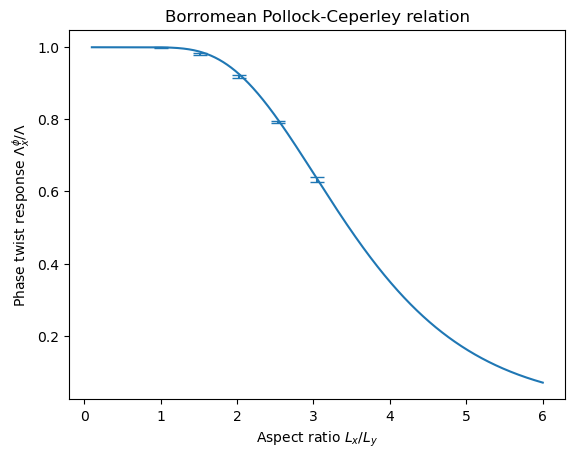

In [21]:
r = np.linspace(0.1,6,1000)
c_arr = [3]
N_terms = 4
ax=plt.gca()

colors = []
color_opt = iter(tuple(plt.rcParams['axes.prop_cycle'].by_key()['color']))

for c in c_arr:
    color = next(color_opt)
    print(f'{c}. Delta num: {delta(c, 1, 1)}. Delta 1: {delta_1(c, 1)}')
    plt.plot(r, 1 - delta(c, N_terms, r), label = f'{c} colors', color=color)
    colors.append(color)

plt.errorbar((size_x - 1) / (size_y - 1), w_diff_x / w_diff_y, yerr=(w_diff_x_s / w_diff_x), linestyle='', capsize=5)

plt.title('Borromean Pollock-Ceperley relation')
plt.ylabel(r'Phase twist response $\Lambda_x^{\phi}/\Lambda$')
plt.xlabel(r'Aspect ratio $L_x/L_y$')
#plt.yscale('log')
plt.savefig('../images/aspect.pdf')

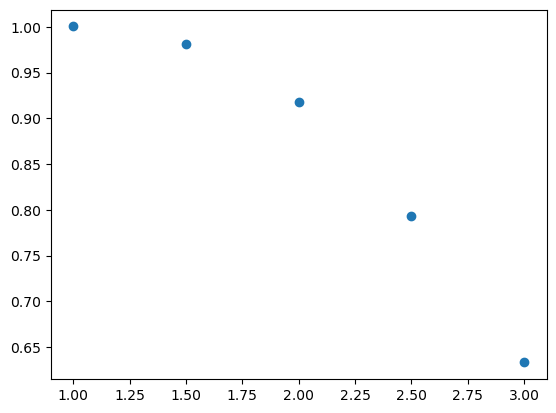

In [8]:
plt.scatter(size_x / size_y, w_diff_x / w_diff_y)

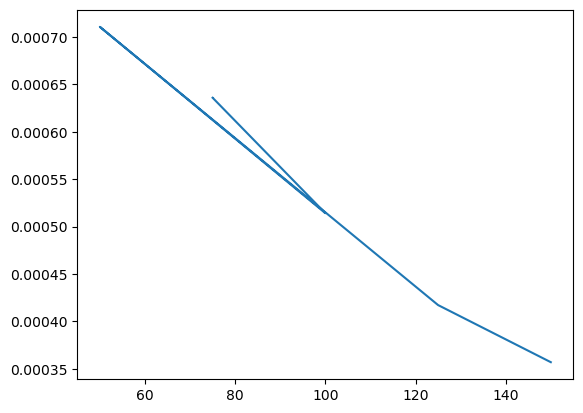

In [48]:
plt.errorbar(size_x, ann, yerr=ann_s)
plt.show()

In [49]:
cw

array([0.454, 0.454, 0.454, 0.454, 0.454])

In [50]:
size_x[cw == 0.47]

array([], dtype=float64)

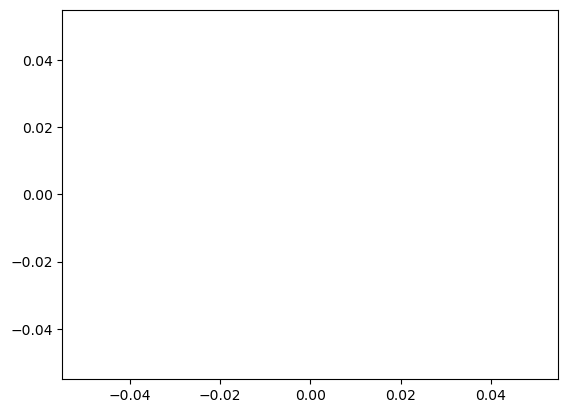

In [51]:
plt.scatter(size_x[cw == 0.47], (w_diff_x / size_x ** 2 / 3)[cw == 0.47])

In [42]:
K_test = np.array([  7.,  10.,  14.,  18.,  24.,  32.,  43.,  57.,  75., 100.])
res_test = np.array([0.67947209, 0.67860682, 0.67761398, 0.67890227, 0.67858906,
        0.68054088, 0.67945015, 0.67942437, 0.67965498, 0.67932908])
err_test = np.array([0.0014401 , 0.00146349, 0.00106988, 0.00112629, 0.00263975,
        0.0012501 , 0.00167341, 0.00150656, 0.00184313, 0.00282689])

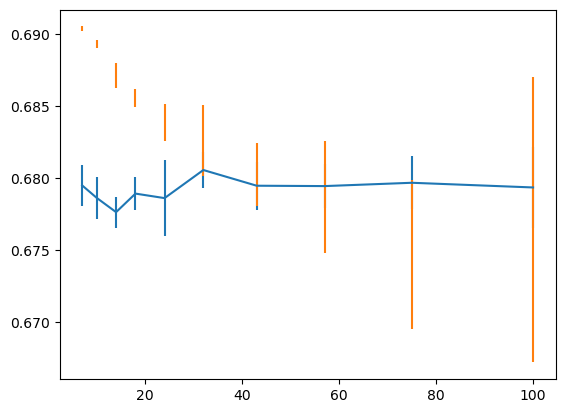

In [43]:
plt.errorbar(K_test, res_test, yerr=err_test)
plt.errorbar(size_x[cw == 0.47], (w_diff_x / size_x ** 2 / 3)[cw == 0.47], yerr=(w_diff_x_s / size_x ** 2 / np.sqrt(5))[cw == 0.47], linestyle='')
plt.show()

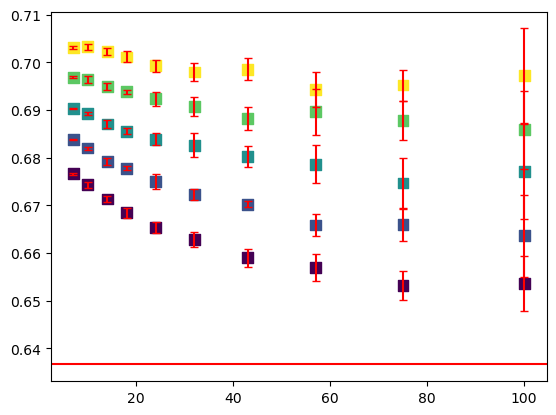

In [29]:
plt.scatter(size_x, w_diff_x / size_x ** 2 / 3, marker='s', s=60, cmap='viridis', vmin=np.min(cw), vmax=np.max(cw), c=cw)
plt.scatter(size_x, w_diff_x / size_x ** 2 / 3, marker='o', s=30, cmap='viridis', vmin=np.min(sw), vmax=np.max(sw), c=sw)
plt.errorbar(size_x, w_diff_x / size_x ** 2 / 3, yerr=w_diff_x_s / size_x ** 2 / np.sqrt(5), color='r', linestyle='', capsize=3)
plt.axhline(y=2 / np.pi, color='r', linestyle='-')
plt.show()

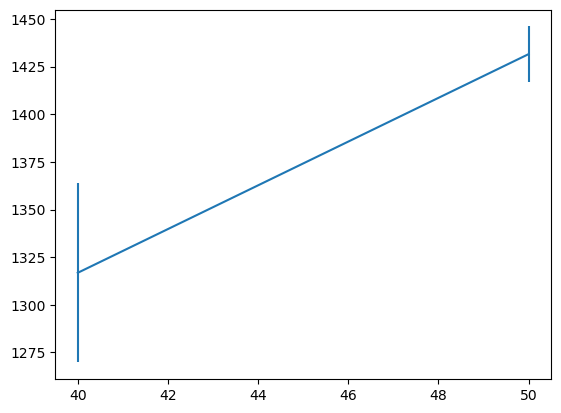

In [8]:
plt.errorbar(size_x, w_diff_y, yerr=w_diff_y_s)
plt.show()

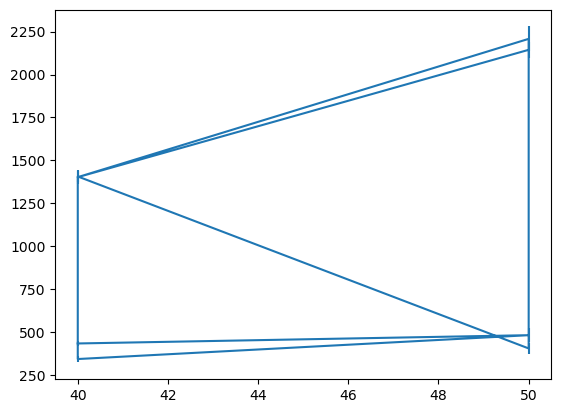

In [21]:
plt.errorbar(size_x, w_sum_x, yerr=w_sum_x_s)
plt.show()

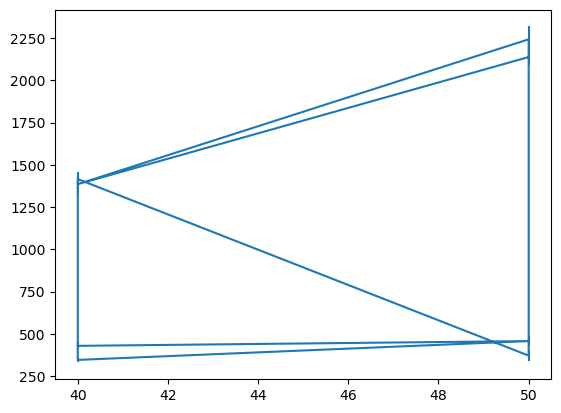

In [22]:
plt.errorbar(size_x, w_sum_y, yerr=w_sum_y_s)
plt.show()